In [1]:
#image classification using Alexnet

In [2]:
import keras  
import tensorflow as tf                            
from keras.datasets import cifar10 
from keras import layers 
#from tensorflow import kerasima

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                   
import random 

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


data visualization

In [5]:
def getRandomSample(X,y):
  temp = list(zip(X, y))
  random.shuffle(temp)
  k=0
  index = []
  for i,j in temp:
    if j[0]==k:
      index.append([i,j[0]])
      k+=1
    if k>=10:
      break
  return index

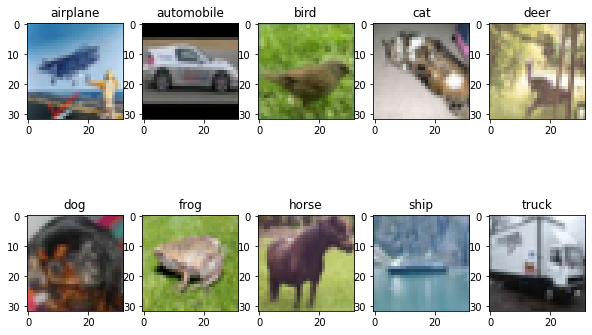

In [6]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples = getRandomSample(X_train, y_train)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,5,i+1)    
    plt.imshow(samples[i][0])
    plt.title(labels[samples[i][1]])
plt.show()


In [7]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
classes_count=10
y_train_ = tf.keras.utils.to_categorical(y_train, classes_count)
y_test_  = tf.keras.utils.to_categorical(y_test, classes_count)

In [8]:
from keras import datasets, layers, models
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        2688      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 256)      1024      
 hNormalization)                                                 
                                                        

In [9]:
model.compile(optimizer = 'sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
epochs=10
hist = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 33s 14ms/step - loss: 1.5772 - accuracy: 0.4465
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0594 - accuracy: 0.6287
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8481 - accuracy: 0.7016
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7043 - accuracy: 0.7564
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5921 - accuracy: 0.7927
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.5078 - accuracy: 0.8247
Epoch 7/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.4222 - accuracy: 0.8522
Epoch 8/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3503 - accuracy: 0.8774
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.2864 - accuracy: 0.9001
Epoch 10/10
1563/1563 [==============================] - 23s 15m

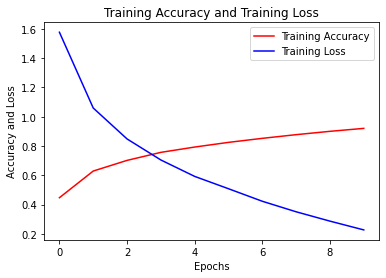

In [11]:
plt.plot(range(epochs), hist.history['accuracy'], 'r', label = 'Training Accuracy')
plt.plot(range(epochs), hist.history['loss'], 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()

In [12]:
train_acc = model.evaluate(X_train, y_train, verbose =0)
test_acc = model.evaluate(X_test, y_test,verbose= 0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc[1], test_acc[1]))

Train accuracy: 0.909, Test accuracy: 0.768


Predicted :  airplane
Actual :  airplane


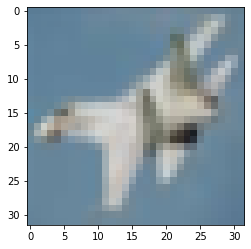

In [13]:
index_to_predict = 10
predicted_class = model.predict(X_test[index_to_predict].reshape(-1,32,32,3))
print("Predicted : ", labels[np.argmax(predicted_class)])
print("Actual : ", labels[np.argmax(y_test[index_to_predict][0])])
plt.imshow(X_test[index_to_predict])
plt.show()

In [14]:
improved_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2058, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

improved_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 96)        2688      
                                                                 
 batch_normalization_5 (Batc  (None, 30, 30, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 256)      1024      
 hNormalization)                                                 
                                                      

In [15]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001,momentum= 0.9)      
improved_model.compile(optimizer = opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])          # optimzer is Stochastic gradient descent 

In [16]:
hist = improved_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)  

Epoch 1/10
782/782 [==============================] - 22s 26ms/step - loss: 2.3672 - accuracy: 0.1290
Epoch 2/10
782/782 [==============================] - 21s 27ms/step - loss: 2.0988 - accuracy: 0.2058
Epoch 3/10
782/782 [==============================] - 21s 27ms/step - loss: 1.9029 - accuracy: 0.2633
Epoch 4/10
782/782 [==============================] - 21s 27ms/step - loss: 1.7536 - accuracy: 0.3146
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 1.6248 - accuracy: 0.3641
Epoch 6/10
782/782 [==============================] - 21s 27ms/step - loss: 1.5004 - accuracy: 0.4238
Epoch 7/10
782/782 [==============================] - 21s 27ms/step - loss: 1.3946 - accuracy: 0.4752
Epoch 8/10
782/782 [==============================] - 21s 27ms/step - loss: 1.2855 - accuracy: 0.5219
Epoch 9/10
782/782 [==============================] - 21s 27ms/step - loss: 1.1894 - accuracy: 0.5652
Epoch 10/10
782/782 [==============================] - 21s 27ms/step - loss: 1.106

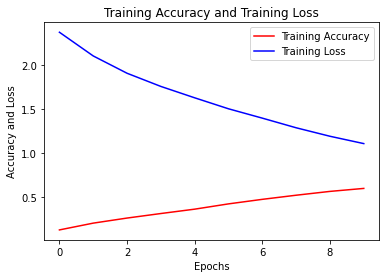

In [17]:
plt.plot(range(epochs), hist.history['accuracy'], 'r', label = 'Training Accuracy')
plt.plot(range(epochs), hist.history['loss'], 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()

In [18]:
train_acc = improved_model.evaluate(X_train, y_train, verbose =0)
test_acc = improved_model.evaluate(X_test, y_test,verbose= 0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc[1], test_acc[1]))

Train accuracy: 0.642, Test accuracy: 0.606


Predicted :  airplane
Actual :  airplane


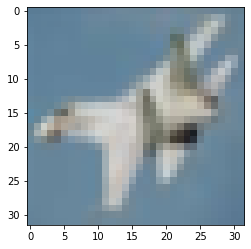

In [19]:
index_to_predict = 10
predicted_class = improved_model.predict(X_test[index_to_predict].reshape(-1,32,32,3))
print("Predicted : ", labels[np.argmax(predicted_class)])
print("Actual : ", labels[np.argmax(y_test[index_to_predict][0])])
plt.imshow(X_test[index_to_predict])
plt.show()